In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv


# Tasks: Preprocessing and EDA Steps

## Step 1: Load the Data
* Import the necessary libraries (pandas, numpy, matplotlib, seaborn).
*  Load the dataset into a pandas DataFrame using pd.read_csv() or from the provided file
* • Display the first few rows using .head() to understand the structure.

In [2]:
df = pd.read_csv("/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


## Step 2: Inspect the Data
1. Shape: Use .shape to check the number of rows and columns.
2. Columns: Use .columns to list column names.
3. Info: Use .info() to examine data types and non-null counts for each column.
4. Description: Use .describe() to summarize numeric columns (mean, min, max, etc.). 

In [3]:
print("Shape of DataFrame: ")
df.shape

Shape of DataFrame: 


(1800, 15)

In [4]:
print("List of Columns:\n")
df.columns

List of Columns:



Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [5]:
print("Data info: \n")
df.info()

Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742

In [6]:
print("Data Description:\n")
df.describe()

Data Description:



,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [7]:
#Max_BPM is wrongly classified as object dtype when it should be numeric, so handle it
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')
print("Datat Type of Max_BPM: ", df['Max_BPM'].dtype)

Datat Type of Max_BPM:  float64


## Step 3: Identify and Handle Missing Values
1. Use .isnull().sum() to check the number of missing values per column.
2. Visualize missing data using a heatmap (sns.heatmap) to identify patterns.
3. Handle missing value
    * **Age, Weight, Height, and Numeric Columns**
      - Impute missing values using the mean or median
    * **Gender and Workout_Type**
      - Impute missing values using the mode (most frequent value)
    * Document and justify your imputation strategyrategy.

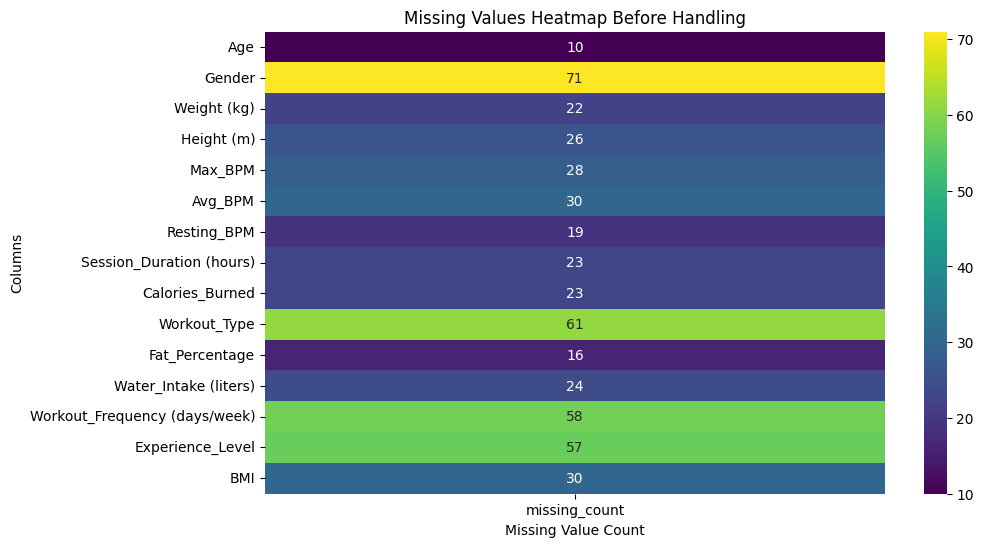

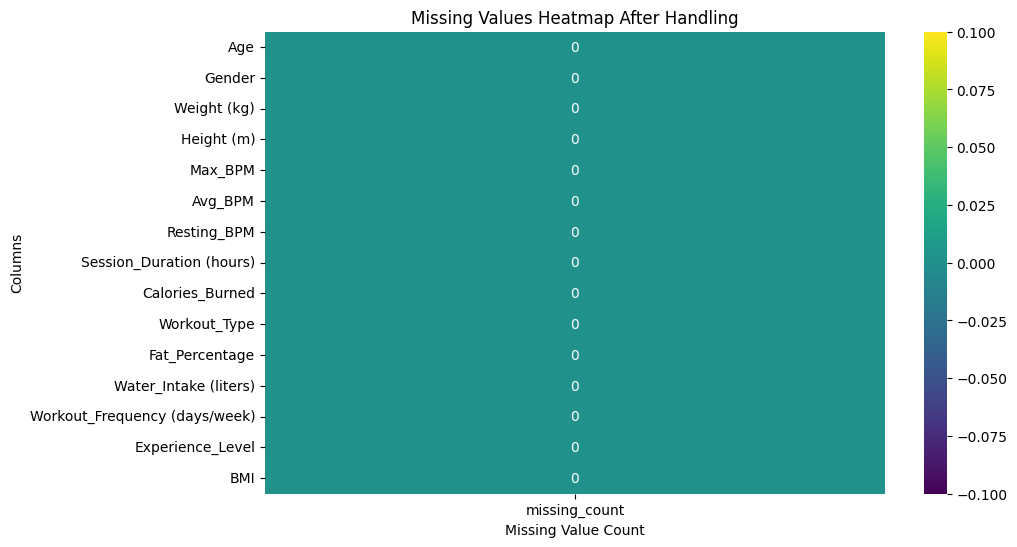

In [8]:
missing_values = df.isnull().sum()

missing_df = pd.DataFrame({'missing_count': missing_values})

plt.figure(figsize=(10, 6))
sns.heatmap(missing_df, annot=True, fmt='d', cmap='viridis')
plt.title('Missing Values Heatmap Before Handling')
plt.ylabel('Columns')
plt.xlabel('Missing Value Count')
plt.show()

if not missing_values.empty:
    numeric_cols = df.select_dtypes(include=np.number).columns
    for column in numeric_cols:
        df.fillna({column: df[column].mean()}, inplace=True)
    df.fillna({'Gender': df['Gender'].mode().iloc[0], 'Workout_Type': df['Workout_Type'].mode().iloc[0]}, inplace=True)

missing_values = df.isnull().sum()

missing_df = pd.DataFrame({'missing_count': missing_values})

plt.figure(figsize=(10, 6))
sns.heatmap(missing_df, annot=True, fmt='d', cmap='viridis')
plt.title('Missing Values Heatmap After Handling')
plt.ylabel('Columns')
plt.xlabel('Missing Value Count')
plt.show()

### Justification:

#### Numeric Columns:
* **Mean Imputation:**
  - Suitable for normally distributed data without significant outliers.
  - It preserves the overall distribution of the data.
* **Median Imputation:**
  - More robust to outliers.
  - It's a better choice when the data is skewed or has extreme values.
#### Categorical Columns:
* **Mode Imputation:**
  - It replaces missing values with the most frequent category, which is a reasonable approach for categorical data.

## Step 4: Check for Duplicates
1. Use .duplicated().sum() to check for duplicate rows.
2. Remove duplicates, if any, using .drop_duplicates().

In [9]:
print("Duplicate Rows before removing: ", df.duplicated().sum())
df.drop_duplicates()
print("Duplicate Rows after removing: ", df.duplicated().sum())

Duplicate Rows before removing:  0
Duplicate Rows after removing:  0


## Step 5: Validate Data
1. Numeric Columns:
   * Check for invalid entries (e.g., special characters like ? in Max_BPM).
   * Convert columns like Max_BPM to numeric using pd.to_numeric() with errors='coerce'.
   * Replace invalid values with NaN and impute as needed.
2. Categorical Columns:
   * Use .unique() to check for inconsistencies in Gender, Workout_Type, etc.
   * Standardize inconsistent values (e.g., Male, M → Male).

In [10]:
#Numerical inconsistency already handled above
print("Unique Values in column Gender: ", df['Gender'].unique())
print("Unique Values in column Workout_Type: ", df['Workout_Type'].unique())
df['Workout_Type'] = df['Workout_Type'].str.replace('\\n', '', regex=False)
df['Workout_Type'] = df['Workout_Type'].str.replace('\\t', '', regex=False)
print("Unique Values in column Workout_Type after standardizing: ", df['Workout_Type'].unique())

Unique Values in column Gender:  ['Female' 'Male']
Unique Values in column Workout_Type:  ['Strength' 'Cardio' 'HIIT' 'Yoga' '\\nStrength' '\\tCardio' '\\tYoga']
Unique Values in column Workout_Type after standardizing:  ['Strength' 'Cardio' 'HIIT' 'Yoga']


## Step 6: Create New Features
1. BMI Validation:
   * Verify if the BMI column is consistent with the formula:

     BMI = weight (kg) / height² (m²)
   * Recalculate BMI where inconsistencies are found.
2. . Workout Intensi:
   * Create a new column: Workout_Intensity = Avg_BPM / Max_BPM

In [11]:
print("Original BMI")
df['BMI'].head(10)

Original BMI


0    14.31
1    33.49
2    12.73
3    20.37
4    20.83
5    13.02
6    18.12
7    19.16
8    49.84
9    12.32
Name: BMI, dtype: float64

In [12]:
df['ReCalculated_BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
print("ReCalculated_BMI")
df['ReCalculated_BMI'].head(10)

ReCalculated_BMI


0    25.060701
1    25.291887
2    18.933528
3    22.732762
4    17.439556
5    21.230572
6    14.193706
7    33.309496
8    34.955304
9    21.766416
Name: ReCalculated_BMI, dtype: float64

In [13]:
print("Updated BMI")
mask = df['BMI'] != df['ReCalculated_BMI']
df.loc[mask, 'BMI'] = df.loc[mask, 'ReCalculated_BMI']
df['BMI'].head(10)

Updated BMI


0    25.060701
1    25.291887
2    18.933528
3    22.732762
4    17.439556
5    21.230572
6    14.193706
7    33.309496
8    34.955304
9    21.766416
Name: BMI, dtype: float64

In [14]:
df['Workout_Intensity'] = df['Avg_BPM'] / df['Max_BPM']
print("Workout_Intensity")
df['Workout_Intensity'].head(10)

Workout_Intensity


0    0.873563
1    0.939759
2    0.887701
3    0.903743
4    0.954802
5    0.795031
6    0.743455
7    0.751381
8    0.971264
9    0.866667
Name: Workout_Intensity, dtype: float64

## Step 7: Explore Data Distributions
1. Plot histograms for numeric columns (Age, Calories_Burned, etc.) to understand their distributions.
2. Use box plots to check for outliers in columns like Age, BMI, and Calories_Burned.
3. Examine the distribution of categorical columns (Gender, Workout_Type) using b r plots.

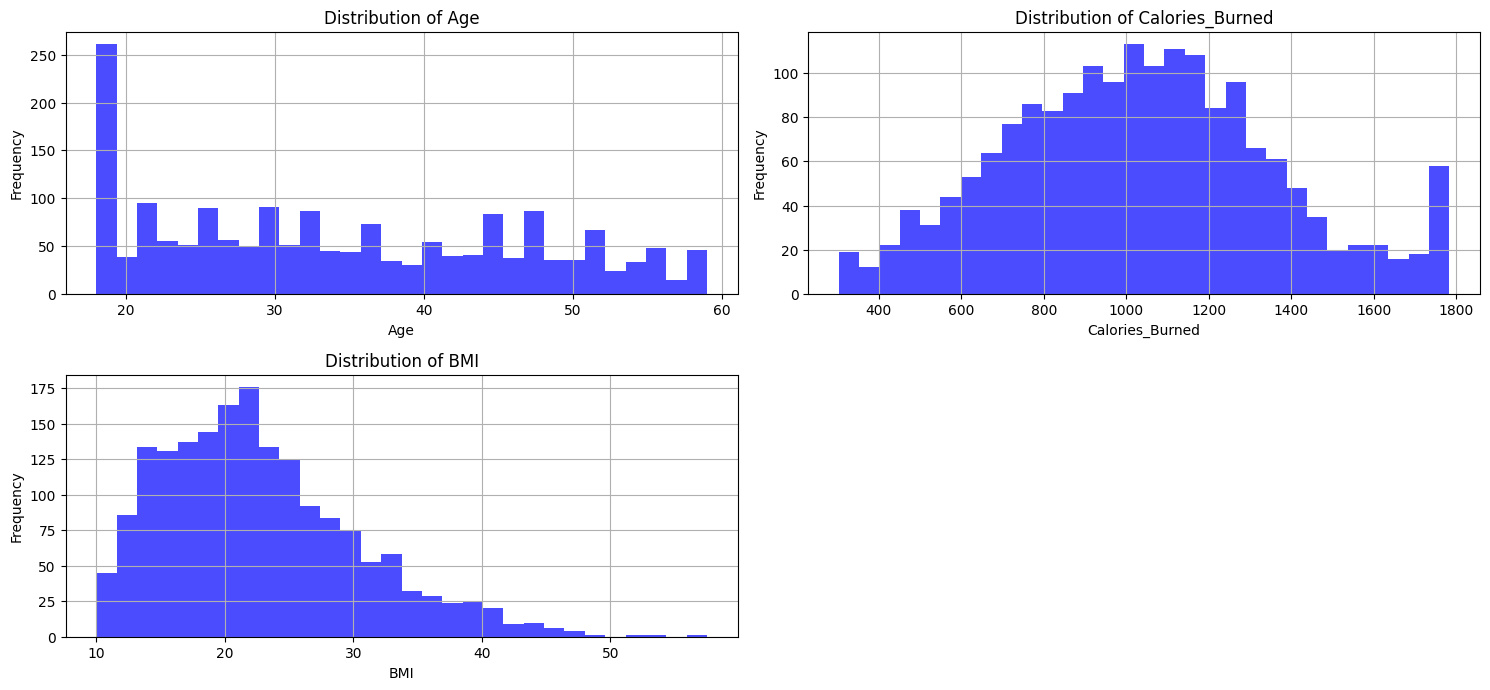

In [15]:
numeric_columns = ['Age', 'Calories_Burned', 'BMI']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1) 
    df[col].hist(bins=30, alpha=0.7, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

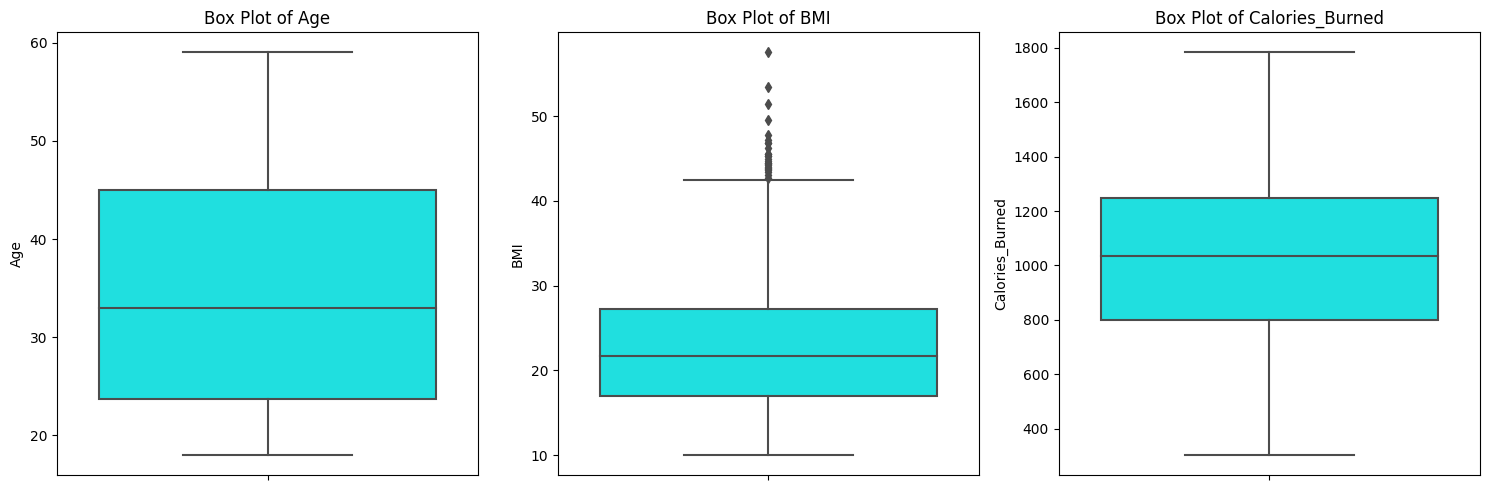

In [16]:
outlier_columns = ['Age', 'BMI', 'Calories_Burned']

plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_columns):
    plt.subplot(1, 3, i + 1) 
    sns.boxplot(y=df[col], color='cyan')
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

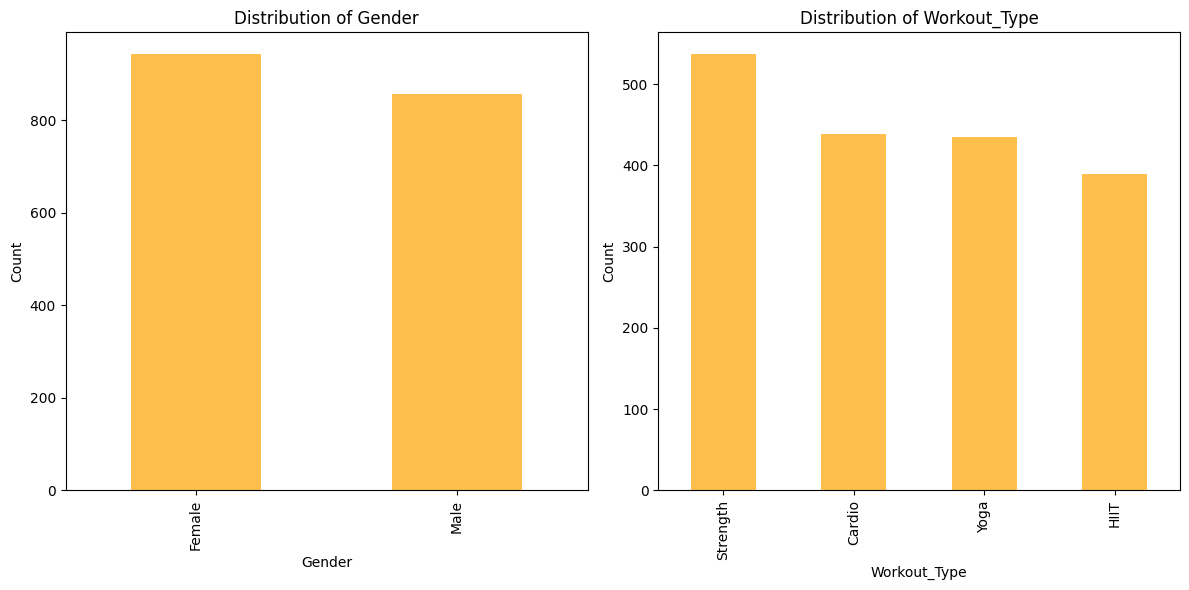

In [17]:
categorical_columns = ['Gender', 'Workout_Type']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 2, i + 1)
    df[col].value_counts().plot(kind='bar', color='orange', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Step 8: Handle Outliers
1. Use the IQR method to detect outliers in numeric columns.
2. Decide whether to
   * Remove outliers.
   * Transform them (e.g., log transformation).
   * Cap them (e.g., set to a specific threshold):

In [19]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
numeric_cols = df.select_dtypes(include=np.number).columns
df = remove_outliers(df, numeric_cols)
print("Data preprocessed. Ready for visualization.")

Data preprocessed. Ready for visualization.


## Step 9: Analyze Relationships
1. Correlation:
   * Use .corr() and visualize with a heatmap to find relationships between numeric columns (e.g., Calories_Burned, Session_Duration).
2. Categorical vs. Numeric:
   * Compare Calories_Burned and Workout_Type using a bar plot.
   * Analyze differences in BMI across Gender using a box plot.
4. Multi-Variable:
   * Use pair plots (sns.pairplot) to analyze relationships between key metrics (e.g., BMI, Calories_Burned, Workout_Frequency).quency).

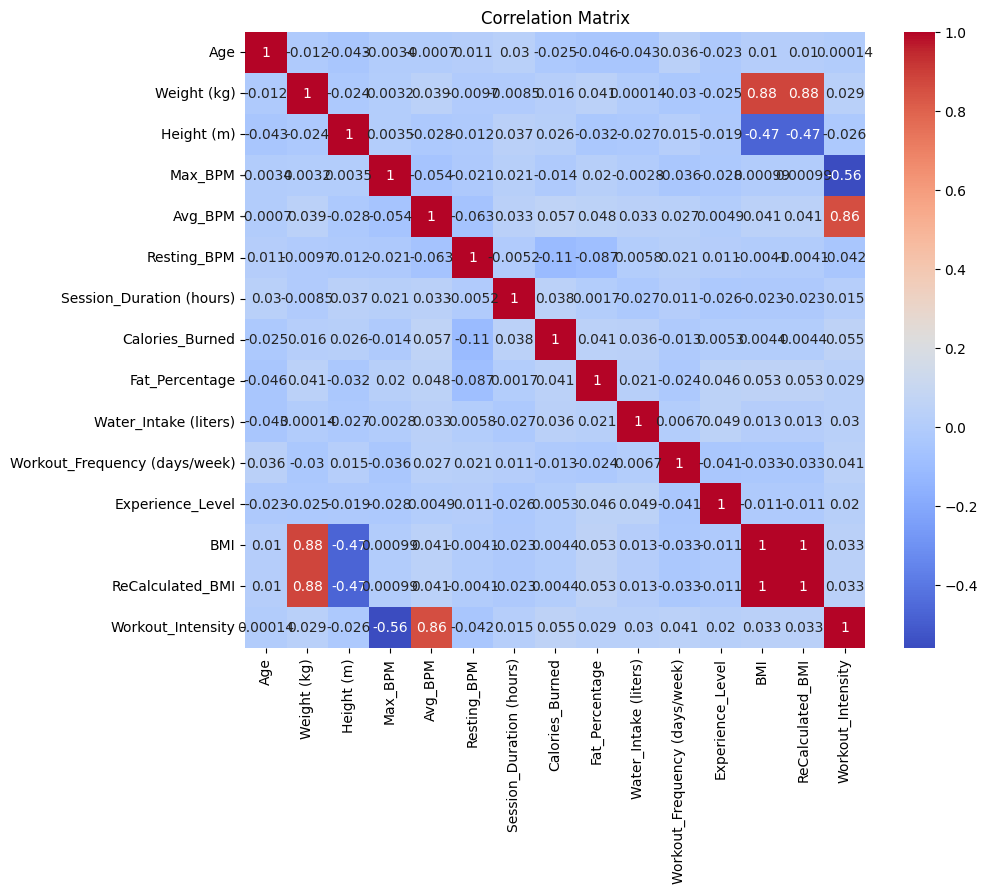

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

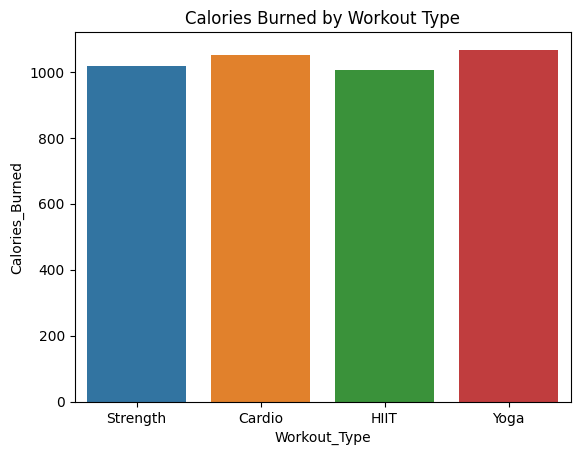

In [23]:
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, errorbar=None)
plt.title('Calories Burned by Workout Type')
plt.show()

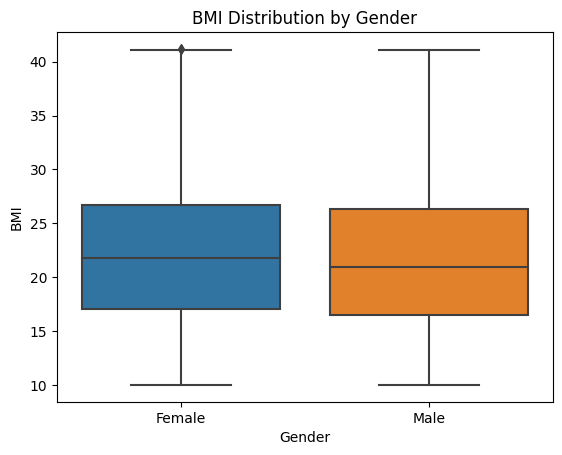

In [24]:
sns.boxplot(x='Gender', y='BMI', data=df)
plt.title('BMI Distribution by Gender')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


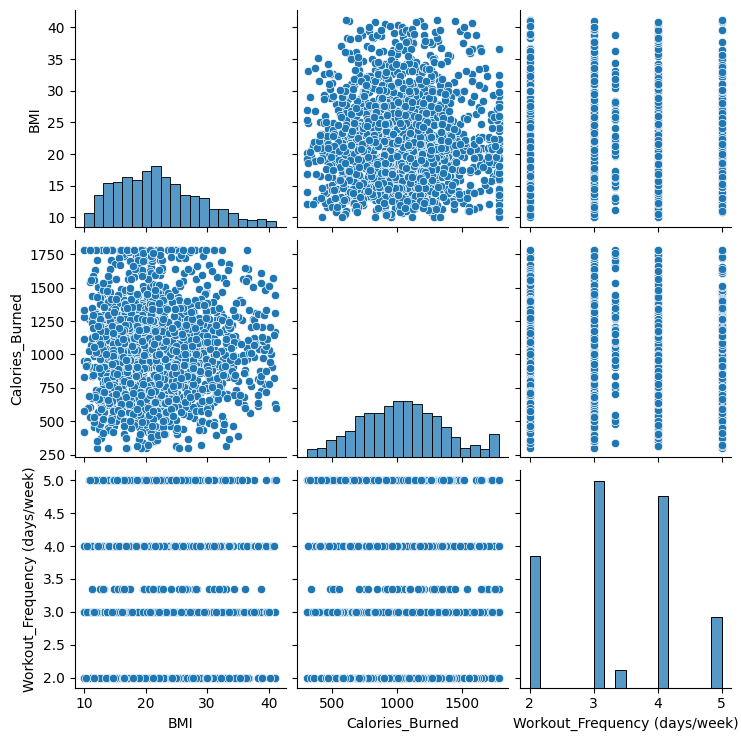

In [28]:
df = df.replace([np.inf, -np.inf], np.nan)

sns.pairplot(df[['BMI', 'Calories_Burned', 'Workout_Frequency (days/week)']])
plt.show()

## Step 10: Encode Categorical Variables
1. Convert Gender and Workout_Type to numeric formats:    * Use one-hot encoding (pd.get_dummies()) or label encoding.

In [39]:
df_encoded = pd.get_dummies(df, columns=['Gender'])
print("Gender is encoded with dummy values in 'df_encoded'")

Gender is encoded with dummy values in 'df_encoded'


## Step 11: Normalize Numeric Columns
Normalize or standardize columns with large ranges (Calories_Burned, Session_Duration, etc.) if 
needed for further analysis or machine learning.

In [38]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Calories_Burned', 'Session_Duration (hours)']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
print("Columns Standardized")

Columns Standardized


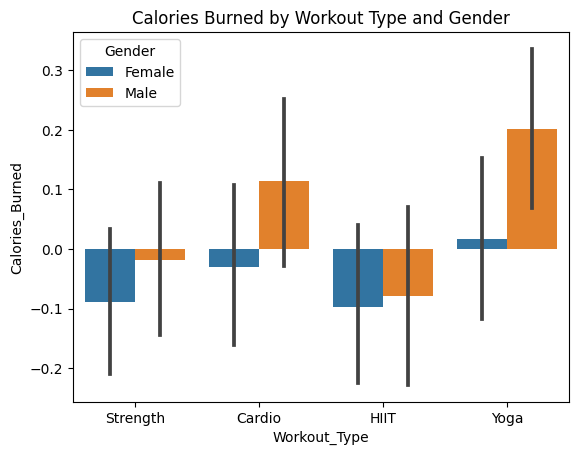

In [32]:
sns.barplot(x='Workout_Type', y='Calories_Burned', hue='Gender', data=df)
plt.title('Calories Burned by Workout Type and Gender')
plt.show()

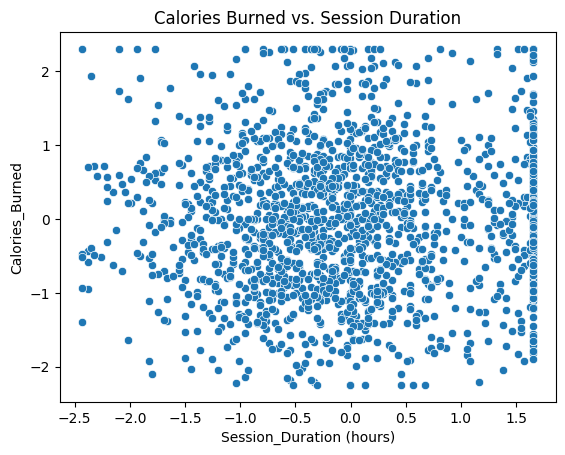

In [34]:
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=df)
plt.title('Calories Burned vs. Session Duration')
plt.show()

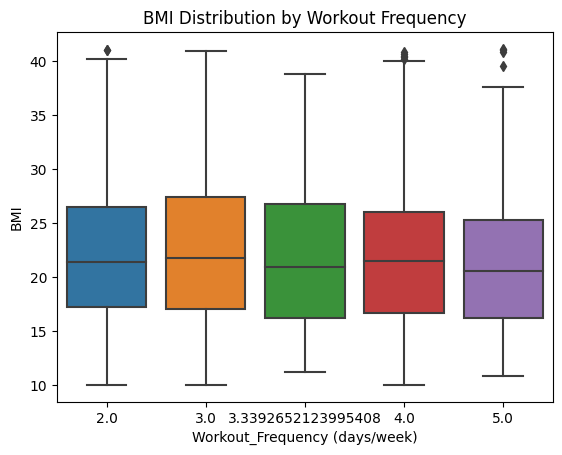

In [37]:
sns.boxplot(x='Workout_Frequency (days/week)', y='BMI', data=df)
plt.title('BMI Distribution by Workout Frequency')
plt.show()